# Analyse camSetupFolder

Script zu Analyse einer Referenzprozedur anhand von Setup-Verzeichnissen, die von der CCamConsole oder von csControl während der Referenzprozedur einer Kamera erzeugt werden.
Diese Verzeichnisse werden unter C:\ipc\data\dc erzeugt und enthalten u.A. Kamerabilder aus den Schritten der Referenzprozedur.

Unter K:/Messdaten/AIO/camSetup/ liegen ebenfalls gesammelte Verzeichnisse von Referenzprozeduren.

## Pakete importieren

In [1]:
import numpy as np
import cv2 as cv2
from matplotlib import pyplot as plt
import os.path
from os import path

## Hier die Parameter festlegen
In der nächsten Zelle die Parameter festlegen:
* Mit *myFolder* das Setup-Verzeichnis definieren (z.B.: "camSetup_2021-02-12T12_51_34")
* Mit *myCamera* die Kamera definieren (z.B.: "Camera0")
* Mittels *BaseFolder* das Basisverzeichnis festlegen
* Script laufen lassen

In [2]:
myFolder = "camSetup_2021-02-12T12_51_34"
myCamera = "camera0"

IPC_Folder = "C:/ipc/data/cs/" # zu verwenden auf einem Prüfstand oder einer Maschine
AIO_Folder = "K:/Messdaten/AIO/camSetup/" # zu verwenden auf einem anderen Rechner
BaseFolder = AIO_Folder

### Prüfen, ob das angegebene Verzeichnis existiert:

In [3]:
folder = BaseFolder + myFolder + "/" + myCamera + "/"
if not path.isdir(folder):
    print("Verzeichnis NICHT gefunden: '" + folder + "''")
else:
    print("Verzeichnis OK.")


Verzeichnis OK.


## Definitionen

In [4]:
setupImage = []
setupImage.append({"name": "image03_W_UsedForGain"})
setupImage.append({"name": "image04_K_UsedForGain"})
setupImage.append({"name": "image05_W_GainsAdjusted"})
setupImage.append({"name": "image06_K_GainsAdjusted"})
setupImage.append({"name": "image09_W_PRNUApplied"})
setupImage.append({"name": "image10_K_PRNUApplied"})

setupStep = []
i_img = 0
setupStep.append({"name": "UsedForGain", "BrightImage": setupImage[0], "DarkImage": setupImage[1]})
setupStep.append({"name": "GainsAdjusted", "BrightImage": setupImage[2], "DarkImage": setupImage[3]})
setupStep.append({"name": "PRNUApplied", "BrightImage": setupImage[4], "DarkImage": setupImage[5]})

col = ["r", "g", "b"]

In [5]:
for step in setupImage:
    step["imageName"] = step["name"] + "_001.bmp"

## Bilder einlesen

In [6]:
imageNames = ["image03_W_UsedForGain_001.bmp", "image04_K_UsedForGain_001.bmp"]
for step in setupImage:
    fullImageFileName = folder + step["imageName"]
    print("reading " + fullImageFileName)
    step["img"] = cv2.imread(fullImageFileName)

reading K:/Messdaten/AIO/camSetup/camSetup_2021-02-12T12_51_34/camera0/image03_W_UsedForGain_001.bmp
reading K:/Messdaten/AIO/camSetup/camSetup_2021-02-12T12_51_34/camera0/image04_K_UsedForGain_001.bmp
reading K:/Messdaten/AIO/camSetup/camSetup_2021-02-12T12_51_34/camera0/image05_W_GainsAdjusted_001.bmp
reading K:/Messdaten/AIO/camSetup/camSetup_2021-02-12T12_51_34/camera0/image06_K_GainsAdjusted_001.bmp
reading K:/Messdaten/AIO/camSetup/camSetup_2021-02-12T12_51_34/camera0/image09_W_PRNUApplied_001.bmp
reading K:/Messdaten/AIO/camSetup/camSetup_2021-02-12T12_51_34/camera0/image10_K_PRNUApplied_001.bmp


## Auswertungen

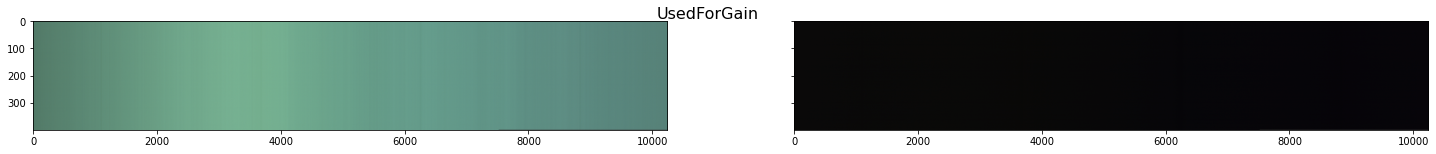

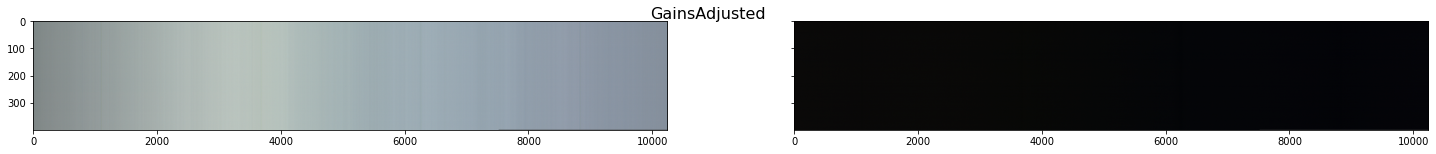

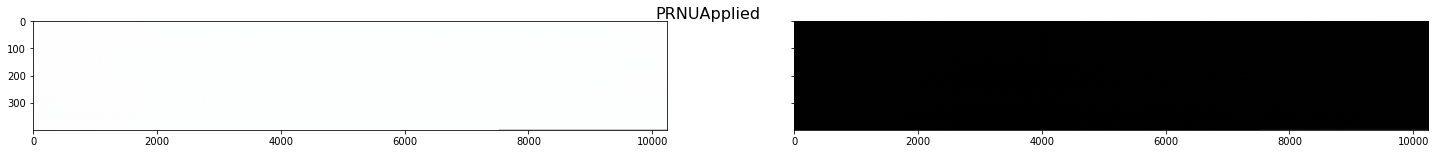

In [7]:
for step in setupStep:    
    fig=plt.figure(figsize=(25,2))
    plt.suptitle(step["name"], fontsize=16);
    axs = fig.subplots(1, 2, sharey=True)
    axs[0].imshow(step["BrightImage"]["img"])
    axs[0].axis('auto')
    axs[1].imshow(step["DarkImage"]["img"])
    axs[1].axis('auto')
    plt.show()

### Histogramme der Farben (R, G, B)

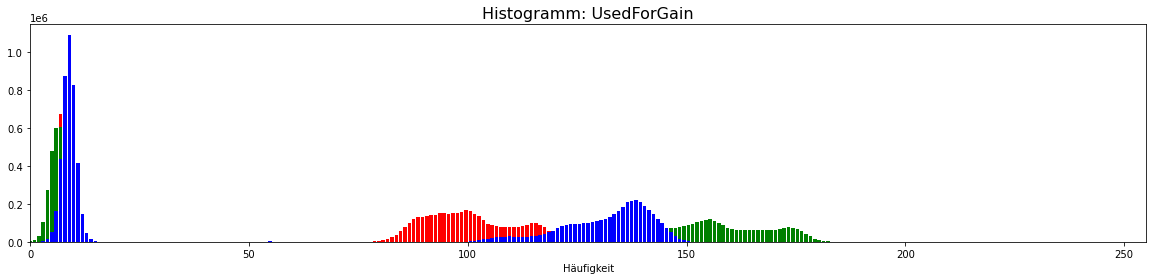

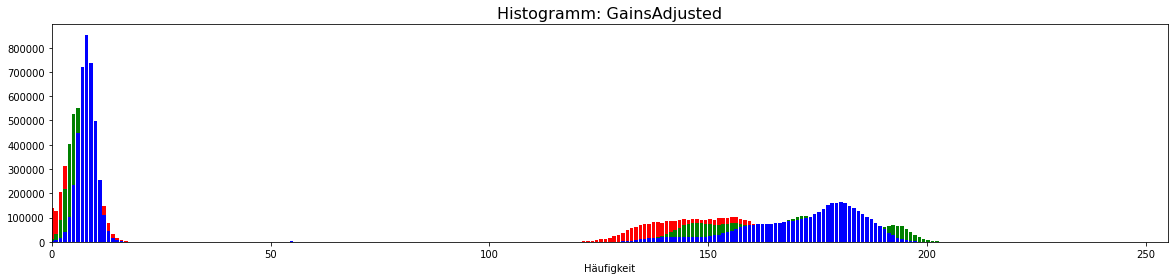

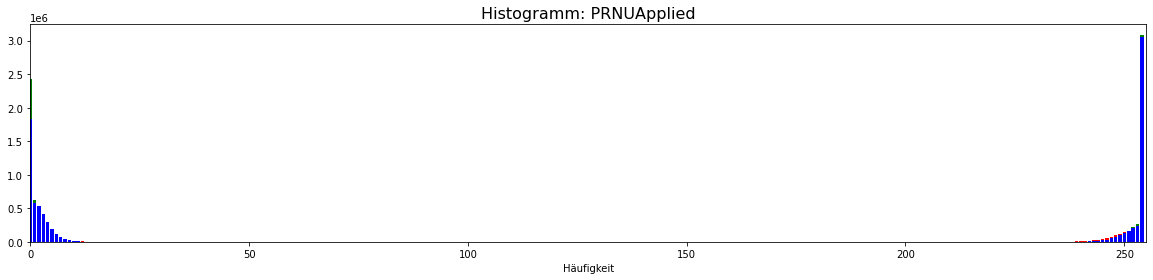

In [8]:
for step in setupStep:    
    fig=plt.figure(figsize=(20,4))
    for i in [0, 1, 2]:
        hist, bin_edges = np.histogram(step["BrightImage"]["img"][:,:,i], bins=256, range=(0, 255))
        plt.bar(bin_edges[0:-1], hist, facecolor=col[i])
        hist, bin_edges = np.histogram(step["DarkImage"]["img"][:,:,i], bins=256, range=(0, 255))
        plt.bar(bin_edges[0:-1], hist, facecolor=col[i])
        plt.title("Histogramm: " + step["name"], fontsize=16);
        plt.xlim(0, 255)
        plt.xlabel("Farbwert")
        plt.xlabel("Häufigkeit")
    plt.show();


### Mittelwert-Profile (gemittelt über die Zeilen)

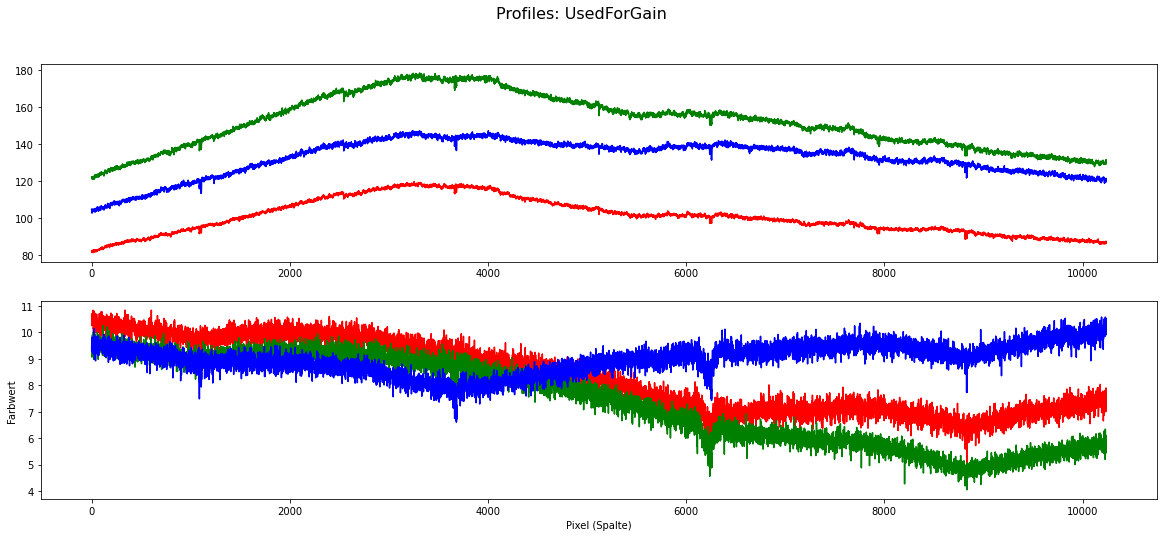

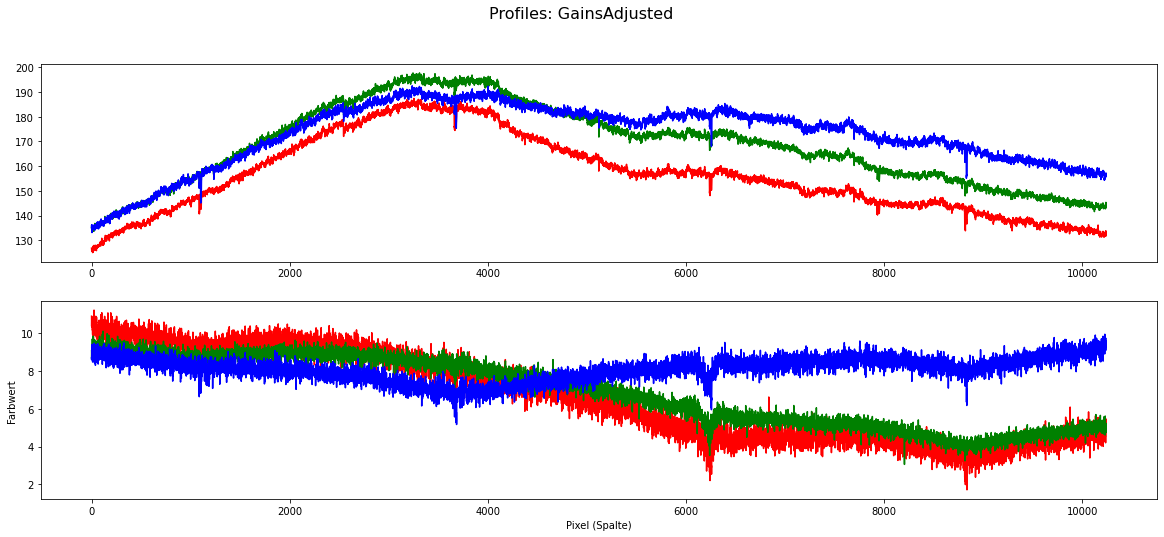

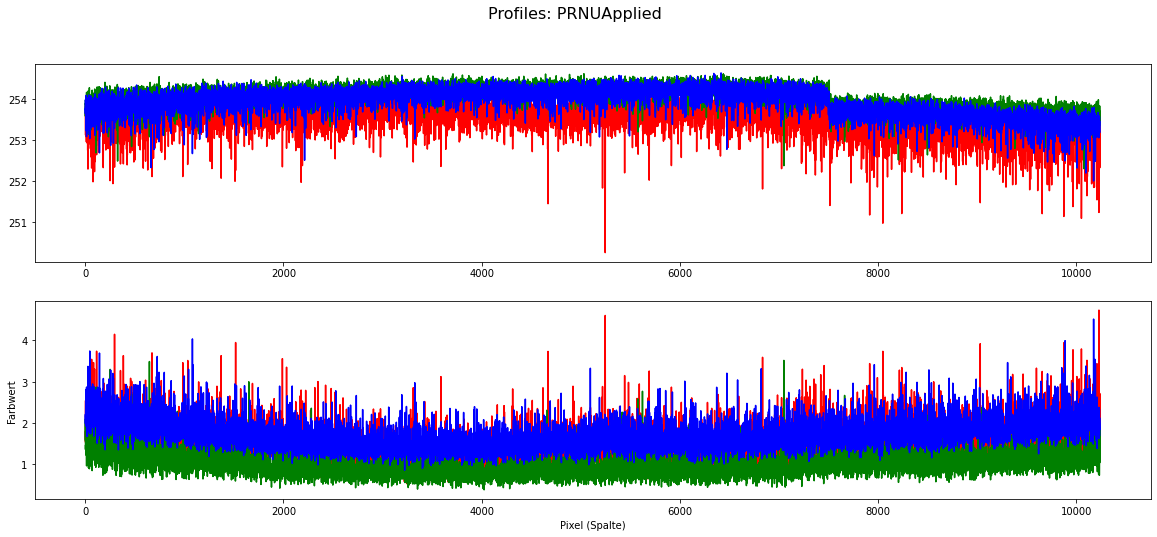

In [9]:
for step in setupStep:
    fig=plt.figure(figsize=(20,8))
    plt.suptitle("Profiles: " + step["name"], fontsize=16);
    axs = fig.subplots(2, 1)    
    for i in [0, 1, 2]:
        profile = np.average(step["BrightImage"]["img"][:,:,i],0)        
        axs[0].plot(profile, col[i])        
        plt.ylabel("Frabwert")
        plt.xlabel("Pixel (Spalte)")

        profile = np.average(step["DarkImage"]["img"][:,:,i],0)
        axs[1].plot(profile, col[i])
        plt.ylabel("Farbwert")
        plt.xlabel("Pixel (Spalte)")
    plt.show();
    
